# 01 – Data Exploration

Load the Wikipedia graph, inspect basic statistics, and plot degree distributions.


In [3]:
import os, sys

# 1) Make sure Python can import your project modules
#    (assuming your notebook lives in WikiRaceGNN/visuals/)
proj_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, proj_root)
print("Added to PYTHONPATH:", proj_root)

# 2) Point at the *real* CSV you generated under WikiRaceGNN/data/
edge_path = os.path.join(proj_root, "data", "wiki_edges.csv")
print("Loading edges from:", edge_path)


Added to PYTHONPATH: /Users/ilandanial/WikiRaceGNN
Loading edges from: /Users/ilandanial/WikiRaceGNN/data/wiki_edges.csv


In [3]:
from utils.data import load_graph_data_no_pandas

edge_path = "../data/wiki_edges_clean.csv"
data = load_graph_data_no_pandas(edge_path, feature_dim=64, max_nodes=1000)
print(data)
print(f"Num nodes: {data.x.size(0)}, Num edges: {data.edge_index.size(1)//2}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Data(
  x=[1000, 64],
  edge_index=[2, 3964],
  node_mapping={
    Delphi (software)=0,
    Elka 22=1,
    Class (computer science)=2,
    Cadence Design Systems=3,
    PMID (identifier)=4,
    Social construction of technology=5,
    JetBrains=6,
    Data=7,
    Street network=8,
    35 mm movie film=9,
    Phablet=10,
    Microsoft WebMatrix=11,
    Class invariant=12,
    Philosophical Transactions=13,
    Calculator=14,
    Systems Network Architecture=15,
    Paul Grice=16,
    Timeline of 

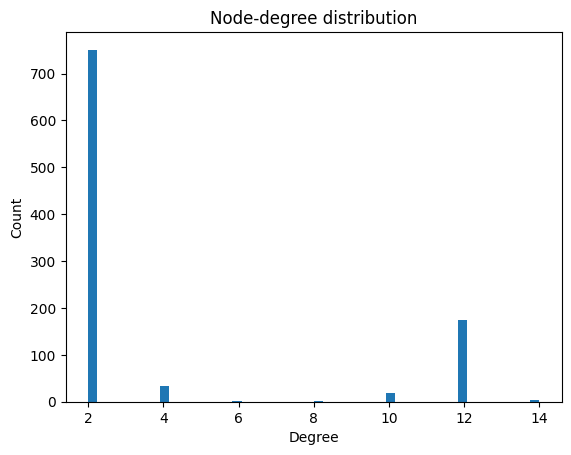

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# compute degrees
deg = Counter(data.edge_index[0].tolist())
degrees = list(deg.values())

# plot histogram
plt.figure()
plt.hist(degrees, bins=50)
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Node‑degree distribution")
plt.show()


In [4]:
import umap
import matplotlib.pyplot as plt

# assume data.x is [num_nodes × feat_dim] torch.Tensor
emb = data.x.numpy()

# configure + run UMAP
reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,   # tweak for local vs global structure
    min_dist=0.1,     # how tightly points are packed
    random_state=42
)
emb2d = reducer.fit_transform(emb)

# plot
plt.figure(figsize=(6,6))
plt.scatter(emb2d[:,0], emb2d[:,1], s=5, alpha=0.7)
plt.title("UMAP of node embeddings")
plt.xlabel("UMAP‑1")
plt.ylabel("UMAP‑2")
plt.show()


/Users/ilandanial/opt/anaconda3/envs/wikigcnn/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SystemError: CPUDispatcher(<function make_heap at 0x1690c3ce0>) returned a result with an exception set

In [ ]:
import networkx as nx

G = nx.Graph()
# pick a small slice
nodes_subset = list(range(min(100, data.x.size(0))))
mask = [ (u in nodes_subset and v in nodes_subset)
         for u,v in zip(data.edge_index[0].tolist(), data.edge_index[1].tolist()) ]

edges = [ (u,v) for (u,v),keep in zip(
            zip(data.edge_index[0].tolist(), data.edge_index[1].tolist()), mask)
         if keep ]

G.add_edges_from(edges)

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.axis("off")
plt.show()
